# <center>PROJECT 03: GROUP</center>

<center><b>Copyright &copy 2023 by DR DANNY POO</b><br> e:dannypoo@nus.edu.sg<br> w:drdannypoo.com</center><br>

You are given a dataset on fraud detection `./data/FraudDetection.csv`.

<b>Objective: To make prediction on fraud using standard Decision Tree Classifier.</b>

Proceed with the following steps to complete this project:
1. Read in the dataset and drop those features that are not useful. Preview the dataset by printing the first 5 rows of dataframe.
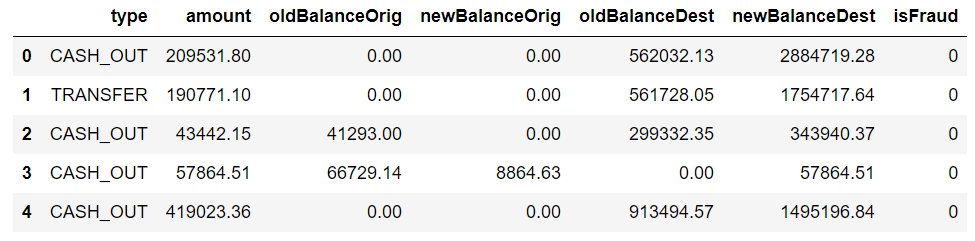
2. `type` is categorical. Change categorical "type" variable to numerical values.
3. The target variable is the `isFraud` variable, other variables are features. Set up the X and y variables based on the raw data.
4. Split data into training set and test set; use 70:30 ratio.
5. Fit and predict the y variables using a standard <b>Decision Tree Classifier</b> from sklearn and print the accuracy score of the training set and test set. Produce classification reports on training and test data.

Skeletal code is provided here. Complete those indicated `write code here`.

**Load Data**

In [1]:
# Import libraries
# write code here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
# 1. Read in the dataset and drop those features that are not useful. 
# Preview the dataset by printing the first 5 rows of dataframe.
# write code here
df = pd.read_csv('./data/FraudDetection.csv')
df.head()




,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,CASH_OUT,209531.80,C968945627,0.00,0.00,C1750956965,562032.13,2884719.28,0,0
1,TRANSFER,190771.10,C1826227285,0.00,0.00,C1531333864,561728.05,1754717.64,0,0
2,CASH_OUT,43442.15,C1787120799,41293.00,0.00,C1039302738,299332.35,343940.37,0,0
3,CASH_OUT,57864.51,C1704809688,66729.14,8864.63,C1018394275,0.00,57864.51,0,0
4,CASH_OUT,419023.36,C971952714,0.00,0.00,C176203926,913494.57,1495196.84,0,0


**Process Data**    

In [14]:
# 2. Change categorical "type" variable to numerical values.
# write code here

df['type'] = np.where(df['type'] == 'TRANSFER', 1,0)



**Split Data**    

In [30]:
# 3. Set up the X and y variables based on the raw data.
# write code here
# X = df.loc[:,df.columns != 'isFraud'].values
X = df[['type','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest', 'newBalanceDest']]
y = df['isFraud']


In [31]:
# 4. Split data into training set and test set; use 70:30 ratio.
# write code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
# Print the shape of training and test dataset
print("Shape of X_train = ", X_train.shape)
print("Shape of X_test = ", X_test.shape)    

# Print test dataset and y
print()
print("X_test\n", X_test)  
print("\ny\n", y_test)

Shape of X_train =  (16249, 6)
Shape of X_test =  (6964, 6)

X_test
        type     amount  oldBalanceOrig  newBalanceOrig  oldBalanceDest  \
156       1  473387.81       473387.81             0.0            0.00   
17631     0   32872.00        32872.00             0.0            0.00   
4534      1   26000.18            0.00             0.0       152829.85   
22106     1  912117.82       912117.82             0.0            0.00   
22836     0   34822.83            0.00             0.0       184449.19   
...     ...        ...             ...             ...             ...   
14012     0   33810.17            0.00             0.0        63658.30   
15702     0  105979.34            0.00             0.0       435962.90   
16919     0  248043.99       248043.99             0.0            0.00   
9258      0   25762.08            0.00             0.0       172255.18   
16574     0  978362.97       978362.97             0.0       123481.51   

       newBalanceDest  
156              0

## Use Standard Decision Tree Classifier Model

**Build Standard Decision Tree Classifier Model**    

In [32]:
# 5. Fit and predict the y variables using a standard Decision Tree Classifier

# Import DecisionTreeClassifier
# write code here

from sklearn import tree


# Create a Decision Tree Classifier
# write code here

clf = tree.DecisionTreeClassifier()


# Train the model using the training sets
# write code here

clf = clf.fit(X_train,y_train)


**Evaluate Standard Decision Tree Classifier Model**    

In [34]:
# 5.Print the accuracy score of the training set and test set.
# write code here

from sklearn.metrics import accuracy_score

X_train_predicted = clf.predict(X_train)
X_test_predicted = clf.predict(X_test)

train_score = accuracy_score(y_train, X_train_predicted)
test_score = accuracy_score(y_test, X_test_predicted)

print('The training set accuracy: {:.2%}'.format(train_score))
print('The test set accuracy: {:.2%}'.format(test_score))  

The training set accuracy: 100.00%
The test set accuracy: 98.79%


In [36]:
# 5. Produce classification reports on training and test data.
# write code here
from sklearn.metrics import classification_report

print("\nClassification report on training data :")

# Get classification report on training data
# write code here

train_report = classification_report(y_train, X_train_predicted)
print(train_report)
print("\nClassification report on test data :")

# Get classification report on test data
# write code here

test_report = classification_report(y_test, X_test_predicted)
print(test_report)


Classification report on training data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10548
           1       1.00      1.00      1.00      5701

    accuracy                           1.00     16249
   macro avg       1.00      1.00      1.00     16249
weighted avg       1.00      1.00      1.00     16249


Classification report on test data :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4452
           1       0.98      0.99      0.98      2512

    accuracy                           0.99      6964
   macro avg       0.99      0.99      0.99      6964
weighted avg       0.99      0.99      0.99      6964

